In [1]:
#import all packages needed for multiple ML models and graphing
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt



# 1. Data Cleaning and Manipulation

In this section, I transform the BRFSS 2015 dataset (Behavioral Risk Factor Surveillance System) into a machine learning-ready format. 

This involves resolving conditional variable logic, addressing formatting inconsistencies, and cleaning the data to ensure it is suitable for modeling.

Our objective variable (label) is '_RFHLTH'. Survey participants would have '_RFHLTH' = 1 if they perceive themselves as healthy and '_RFHLTH' = 2 otherwise.

Other variables record results from a wide range of health-related survey questions asked.

In [2]:
RSEED = 42 #set seed for reproducibility
df = pd.read_csv('2015.csv').sample(100000, random_state = RSEED) #sampled to 100,000 rows for efficiency
pd.set_option('display.max_columns', None) #set display to show every column
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
223424,30.0,2.0,b'02042015',b'02',b'04',b'2015',1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,2.0,NaN,4.0,2.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,88.0,88.0,NaN,2.0,3.0,2.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,5.0,1.0,2.0,NaN,1.0,2.0,2.0,88.0,8.0,1.0,141.0,506.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,103.0,1.0,88.0,2.0,555.0,101.0,315.0,102.0,310.0,220.0,1.0,64.0,103.0,20.0,11.0,103.0,10.0,103.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,777777.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',5.0,301041.0,8.511576,4.0,34.046303,9.0,NaN,NaN,NaN,1.0,0.710896,162.601800,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,66.0,168.0,6396.0,2276.0,2

In the 5 row header above, we can see a few potential issues with the data:

(1) there exists metadata and identifying columns that are not important for analysis (e.g. _STATE, FMONTH)

(2) there exists variables with letters or letters and numbers combined (e.g. EXACTOT1, IDATE)

(3) there exists null values in certain rows

We first pick out variables with number formatting and omit the rest since they do not contribute to classification according to the codebook.


In [3]:
df = df.select_dtypes('number')
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
223424,30.0,2.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,2.0,NaN,4.0,2.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,88.0,88.0,NaN,2.0,3.0,2.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,5.0,1.0,2.0,NaN,1.0,2.0,2.0,88.0,8.0,1.0,141.0,506.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,103.0,1.0,88.0,2.0,555.0,101.0,315.0,102.0,310.0,220.0,1.0,64.0,103.0,20.0,11.0,103.0,10.0,103.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,777777.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,5.0,301041.0,8.511576,4.0,34.046303,9.0,NaN,NaN,NaN,1.0,0.710896,162.601800,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,66.0,168.0,6396.0,2276.0,2.0,1.0,1.0,3.0,5.0,4.0,1.0,1.0,4.300000e+01,1.0,3.000000e+02,1.0,5.397605e-79,100.0,5.000000e+0

In [4]:
#Drop variables with 80% null values
threshold = 0.8  
df_clean1 = df.dropna(axis=1, thresh=int((1-threshold) * len(df)))
df_clean1.head()

# Drop columns with a single unique value (constant columns)
df_clean1 = df_clean1.loc[:, df.nunique() > 1]
df_clean1.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,PVTRESD1,CELLFON3,NUMADULT,NUMMEN,NUMWOMEN,CELLFON2,CADULT,PVTRESD2,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,CAREGIV1,CIMEMLOS,SXORIENT,TRNSGNDR,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
223424,30.0,2.0,1100.0,2.015001e+09,2.015001e+09,1.0,2.0,4.0,2.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,88.0,88.0,NaN,2.0,3.0,2.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,88.0,8.0,1.0,141.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,103.0,1.0,88.0,2.0,555.0,101.0,315.0,102.0,310.0,220.0,1.0,64.0,103.0,20.0,11.0,103.0,10.0,103.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,777777.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,5.0,301041.0,8.511576,4.0,34.046303,9.0,1.0,0.710896,162.601800,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,66.0,168.0,6396.0,2276.0,2.0,1.0,1.0,3.0,5.0,4.0,1.0,1.0,4.300000e+01,1.0,3.000000e+02,1.0,5.397605e-79,100.0,5.000000e+01,200.0,33.0,286.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,100.0,569.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,35.0,38.0,2543.0,436.0,1.0,1.0,20.0,10.0,3000.0,3000.0,60.0,30.0,3.000000e+03,5.397605e-79,60.0,30.0,90.0,5.397605e-79,5.397605e-79,5.397605e-79,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
373769,48.0,12.0,1100.0,2.015014e+09,2.015014e+09,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,2.0,3.0,5.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,NaN,NaN,2.0,1.0,1.0,7.0,1.0,9999.0,505.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,7.0,3.0,888.0,NaN,NaN,NaN,305.0,308.0,315.0,309.0,308.0,312.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,NaN,NaN,NaN,NaN,1.0,1.0,102015.0,6.0,2.0,1.0,72015.0,1.0,NaN,NaN,1.0,4.0,22.0,1.0,NaN,482019.0,196.371933,1.0,196.371933,2.0,9.0,NaN,935.334454,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,1.0,53.0,4.0,65.0,165.0,NaN,NaN,NaN,9.0,2.0,3.0,5.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.700000e+01,27.0,5.000000e+01,30.0,27.0,40.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,44.0,147.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2839.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
155460,23.0,9.0,1100.0,2.015003e+09,2.015003e+09,1.0,2.0,1.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,3.0,88.0,8.0,88.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,6.0,1.0,

In [5]:
# Drop columns where one category dominates (e.g., 99% same value)
for columns in df_clean1.columns:
    top_freq = df_clean1[columns].value_counts(normalize=True, dropna=True).max()
    if top_freq > 0.99:  
        df_clean2 = df_clean1.drop(columns=[columns])
df_clean2.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,PVTRESD1,CELLFON3,NUMADULT,NUMMEN,NUMWOMEN,CELLFON2,CADULT,PVTRESD2,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,CAREGIV1,CIMEMLOS,SXORIENT,TRNSGNDR,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
223424,30.0,2.0,1100.0,2.015001e+09,2.015001e+09,1.0,2.0,4.0,2.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,88.0,88.0,NaN,2.0,3.0,2.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,88.0,8.0,1.0,141.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,103.0,1.0,88.0,2.0,555.0,101.0,315.0,102.0,310.0,220.0,1.0,64.0,103.0,20.0,11.0,103.0,10.0,103.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,777777.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,5.0,301041.0,8.511576,4.0,34.046303,9.0,1.0,0.710896,162.601800,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,66.0,168.0,6396.0,2276.0,2.0,1.0,1.0,3.0,5.0,4.0,1.0,1.0,4.300000e+01,1.0,3.000000e+02,1.0,5.397605e-79,100.0,5.000000e+01,200.0,33.0,286.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,100.0,569.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,35.0,38.0,2543.0,436.0,1.0,1.0,20.0,10.0,3000.0,3000.0,60.0,30.0,3.000000e+03,5.397605e-79,60.0,30.0,90.0,5.397605e-79,5.397605e-79,5.397605e-79,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
373769,48.0,12.0,1100.0,2.015014e+09,2.015014e+09,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,2.0,3.0,5.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,NaN,NaN,2.0,1.0,1.0,7.0,1.0,9999.0,505.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,7.0,3.0,888.0,NaN,NaN,NaN,305.0,308.0,315.0,309.0,308.0,312.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,NaN,NaN,NaN,NaN,1.0,1.0,102015.0,6.0,2.0,1.0,72015.0,1.0,NaN,NaN,1.0,4.0,22.0,1.0,NaN,482019.0,196.371933,1.0,196.371933,2.0,9.0,NaN,935.334454,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,1.0,53.0,4.0,65.0,165.0,NaN,NaN,NaN,9.0,2.0,3.0,5.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.700000e+01,27.0,5.000000e+01,30.0,27.0,40.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,44.0,147.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2839.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
155460,23.0,9.0,1100.0,2.015003e+09,2.015003e+09,1.0,2.0,1.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,3.0,88.0,8.0,88.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,6.0,1.0,2.0,1.0,2.0,1.0

In [6]:
#drop columns that are different versions of the label
df_clean3 = df_clean2.drop(columns = ['POORHLTH','GENHLTH', 'HLTHPLN1'])

In [7]:
#drop metadata and irrelevant columns
useless_vars = ['SEQNO', 'DISPCODE', '_PSU', '_STSTR', '_STRWT', '_LLCPWT', '_WT2RAKE',
                'CELLFON2', 'CELLFON3', '_DUALCOR', 'FMONTH', 'QSTVER', 'QSTLANG', '_STATE',
                'MSCODE', 'IYEAR', 'CADULT', 'CSTATE', '_RAWRAKE', '_CHISPNC', '_DUALUSE']

df_clean4 = df_clean3.drop(columns=[columns for columns in useless_vars if columns in df_clean3.columns])
df_clean4.head()

,PVTRESD1,NUMADULT,NUMMEN,NUMWOMEN,PVTRESD2,LANDLINE,HHADULT,PHYSHLTH,MENTHLTH,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,CAREGIV1,CIMEMLOS,SXORIENT,TRNSGNDR,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
223424,1.0,4.0,2.0,2.000000e+00,NaN,NaN,NaN,88.0,88.0,3.0,2.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,88.0,8.0,1.0,141.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,103.0,1.0,88.0,2.0,555.0,101.0,315.0,102.0,310.0,220.0,1.0,64.0,103.0,20.0,11.0,103.0,10.0,103.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,777777.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,66.0,168.0,6396.0,2276.0,2.0,1.0,1.0,3.0,5.0,4.0,1.0,1.0,4.300000e+01,1.0,3.000000e+02,1.0,5.397605e-79,100.0,5.000000e+01,200.0,33.0,286.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,100.0,569.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,35.0,38.0,2543.0,436.0,1.0,1.0,20.0,10.0,3000.0,3000.0,60.0,30.0,3.000000e+03,5.397605e-79,60.0,30.0,90.0,5.397605e-79,5.397605e-79,5.397605e-79,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
373769,NaN,NaN,NaN,NaN,1.0,2.0,2.0,5.0,2.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,NaN,NaN,2.0,1.0,1.0,7.0,1.0,9999.0,505.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,7.0,3.0,888.0,NaN,NaN,NaN,305.0,308.0,315.0,309.0,308.0,312.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,NaN,NaN,NaN,NaN,1.0,1.0,102015.0,6.0,2.0,1.0,72015.0,1.0,NaN,NaN,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,1.0,53.0,4.0,65.0,165.0,NaN,NaN,NaN,9.0,2.0,3.0,5.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.700000e+01,27.0,5.000000e+01,30.0,27.0,40.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,44.0,147.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2839.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
155460,1.0,1.0,1.0,5.397605e-79,NaN,NaN,NaN,88.0,8.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,6.0,1.0,2.0,1.0,2.0,1.0,88.0,7.0,1.0,225.0,602.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,7.0,3.0,107.0,3.0,4.0,5.0,101.0,305.0,555.0,304.0,205.0,205.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,2.0,2.0,3.0,6.0,1.0,1.0,112014.0,1.0,7.0,1.0,771989.0,4.0,NaN,NaN,NaN,NaN,1.0,9.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,10.0,2.0,66.0,6.0,74.0,188.0,10206.0,2889.0,3.0,2.0,1.0,4.0,5.0,3.0,1.0,1.0,1.000000e+02,2.0,2.100000e+03,2.0,1.000000e+02,17.0,5.397605e-79,13.0,71.0,71.0,5.397605e-79,5.397605e-79,1.0,1.000000e+00,117.0,155.0,1.0,1.0,1.0,5.397605e-79,5

Another major challenge with the dataset is the presence of conditional variables. These are survey questions that were only asked of a specific subset of participants,

depending on their prior responses.


For example, the variable '_PNEUMO2' records whether a respondent received a pneumonia vaccination. However, it only applies to individuals aged 65 or older—that is, 

respondents for whom '_AGE65YR' = 2. As a result, values for younger participants are intentionally left blank because it is inapplicable instead of the answer being unknown.


In order to prepare our dataset for multiple machine learning models, we need to differentiate universal variables from conditional variables and reformat them seperately.

For always asked variables, we divide them into continous, binary and non-binary categorical variables and recode them seperately.

Unknown/refused results of variables take the form of '7', '9', '777', '999', etc., we recode them into NaN values.

Binary variables take the form'1', '2', we recode them into the standard '0', '1' results.

In [8]:

#recode always asked continous variables
always_ask = ['NUMADULT', 'NUMMEN', 'NUMWOMEN', 'HEIGHT3', 'WEIGHT2']
df_clean4[always_ask] = df_clean4[always_ask].replace({
7777: np.nan,
9999: np.nan    
})
#recoding alwasy asked binary variables
binary_vars = [
    'PVTRESD1', 'PVTRESD2', 'LANDLINE', 'MEDCOST', 'BLOODCHO', 'CHOLCHK',
    'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR',
    'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'INTERNET', 'USEEQUIP',
    'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100',
    'EXERANY2', 'FLUSHOT6', 'CAREGIV1', 'CIMEMLOS',
    '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_MICHD',
    '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR1', '_RFBMI5', '_RFSMOK3',
    '_RFBING5', '_RFDRHV5', 'TOLDHI2', 'VETERAN3', 'CPDEMO1', 'NUMHHOL2', 'PNEUVAC3',
    'HIVTST6', 'QLACTLM2', '_HISPANIC'

]
binary_vars = [col for col in binary_vars if col in df_clean4.columns]

df_clean4[binary_vars] = df_clean4[binary_vars].replace({
    2: 0,
    7: np.nan,
    8: np.nan,
    9: np.nan,
    77: np.nan,
    88: np.nan,
    98: np.nan,
    99: np.nan,
    777: np.nan,
    888: np.nan,
    999: np.nan,
    7777: np.nan,
    8888: np.nan,
    9999: np.nan,
    777777: np.nan,
    888888: np.nan,
    999999: np.nan,
    700: np.nan,
    800: np.nan,
    900: np.nan,
    7700: np.nan,
    8800: np.nan,
    9900: np.nan,
    77700: np.nan,
    88800: np.nan,
    99900: np.nan,
    77000: np.nan,
    88000: np.nan,
    99000: np.nan    
})



In [9]:
#convert format for nonbinary alwasy asked categorival varibales
nonbinary_vars = [
    'PERSDOC2', 'BPHIGH4', 'DRNKANY5', 'SEATBELT',
    '_PACAT1', '_PA150R2', '_PA300R2', '_PA30021',
    '_PASTRNG', '_PAREC1', '_PASTAE1',
    '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', 'CHECKUP1', 'HHADULT', 'PHYSHLTH', 'MENTHLTH', 'DIABETE3', 'EDUCA', 'MARITAL','RENTHOM1', 'EMPLOY1', 'SXORIENT', 'TRNSGNDR',
'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FVBEANS', 'FVGREEN',
'FVORANG', 'VEGETAB1', 'STRENGTH', 'CHILDREN', 'INCOME2', 'USENOW3', 'ALCDAY5', '_CHLDCNT', 'STRFREQ_', '_INCOMG'
]
nonbinary_vars = [col for col in nonbinary_vars if col in df_clean4.columns]
df_clean4[nonbinary_vars] = df_clean4[nonbinary_vars].replace({
    7: np.nan,
    8: np.nan,
    9: np.nan,
    77: np.nan,
    88: np.nan,
    98: np.nan,
    99: np.nan,
    777: np.nan,
    888: np.nan,
    999: np.nan,
    7777: np.nan,
    8888: np.nan,
    9999: np.nan,
    777777: np.nan,
    888888: np.nan,
    999999: np.nan,
    700: np.nan,
    800: np.nan,
    900: np.nan,
    7700: np.nan,
    8800: np.nan,
    9900: np.nan,
    77700: np.nan,
    88800: np.nan,
    99900: np.nan,
    77000: np.nan,
    88000: np.nan,
    99000: np.nan
})

In [10]:
#fill null values with the mean
df_clean4[always_ask] = df_clean4[always_ask].apply(
    lambda col: col.fillna(col.mean()))
df_clean4[binary_vars] = df_clean4[binary_vars].apply(
    lambda col: col.fillna(col.mean()))
df_clean4[nonbinary_vars] = df_clean4[nonbinary_vars].apply(
    lambda col: col.fillna(col.mean()))


For conditional variables, we define a function that adds an additional binary variable 'xxx_Was_Asked' for both binary and nonbinary conditional variables. This imporves model

logic and clarity while preventing confusion between missing and inapplicable data. We then find the precursor of all conditional variables and create conditional maps.

In [11]:
#define function for condtional varaibles, for each conditional variable, add a varibale to see if it was asked or not
def recode_conditional_binary_mean(df, col, condition_col, condition_val=1):
    was_asked_flag = f"{col}_WAS_ASKED"
    df[was_asked_flag] = (df[condition_col] == condition_val).astype(int)
    
    filter = df[was_asked_flag] == 1
    df.loc[filter, col] = df.loc[filter, col].replace({
    2: 0, 
    7: np.nan,
    8: np.nan, 
    9: np.nan, 
    77: np.nan, 
    88: np.nan, 
    98: np.nan,
    99: np.nan,
    777: np.nan,
    888: np.nan,
    999: np.nan,
    7777: np.nan,
    8888: np.nan,
    9999: np.nan,
    777777: np.nan,
    888888: np.nan,
    999999: np.nan,
    700: np.nan,
    800: np.nan,
    900: np.nan,
    7700: np.nan,
    8800: np.nan,
    9900: np.nan,
    77700: np.nan,
    88800: np.nan,
    99900: np.nan,
    77000: np.nan,
    88000: np.nan,
    99000: np.nan})

    df.loc[filter, col] = df.loc[filter, col].fillna(df.loc[filter, col].mean())
    return df

def recode_conditional_nonbinary_mean(df, col, condition_col, condition_val=1):
    was_asked_flag = f"{col}_WAS_ASKED"
    df[was_asked_flag] = (df[condition_col] == condition_val).astype(int)
    
    filter = df[was_asked_flag] == 1
    df.loc[filter, col] = df.loc[filter, col].replace({
    7: np.nan, 
    8: np.nan, 
    9: np.nan, 
    77: np.nan, 
    88: np.nan, 
    98: np.nan,
    99: np.nan,
    777: np.nan,
    888: np.nan,
    999: np.nan,
    7777: np.nan,
    8888: np.nan,
    9999: np.nan,
    777777: np.nan,
    888888: np.nan,
    999999: np.nan,
    700: np.nan,
    800: np.nan,
    900: np.nan,
    7700: np.nan,
    8800: np.nan,
    9900: np.nan,
    77700: np.nan,
    88800: np.nan,
    99900: np.nan,
    77000: np.nan,
    88000: np.nan,
    99000: np.nan,
    })

    df.loc[filter, col] = df.loc[filter, col].fillna(df.loc[filter, col].mean())
    return df

In [12]:
#map out what the conditional variables are conditional on
binary_conditional_map = {
    "TOLDHI2": "CHOLCHK",
    "BPMEDS": "BPHIGH4",
    "HIVTSTD3": "HIVTST6"
}
nonbinary_conditional_map = {
    # SMOKING FOLLOW-UPS
    "SMOKDAY2": "SMOKE100",
    "LASTSMK2": "SMOKE100",




    # AGE-BASED VACCINE QUESTIONS
    "_PNEUMO2": "_AGE65YR",
    "PNEUVAC3": "_AGE65YR",

    # FLU SHOT FOLLOW-UP
    "FLSHTMY2": "FLUSHOT6",
    "IMFVPLAC": "FLUSHOT6",

    # HIV FOLLOW-UP
    "WHRTST10": "HIVTST6",

    # ARTHRITIS MODULE
    "LMTJOIN3": "HAVARTH3",
    "ARTHDIS2": "HAVARTH3",
    "ARTHSOCL": "HAVARTH3",
    "JOINPAIN": "HAVARTH3",

    # DRINKING FOLLOW-UP
    "DROCDY3_": "DRNKANY5",
    "_DRNKWEK": "DRNKANY5",

    # PHYSICAL ACTIVITY (if EXERANY2 == 1)
    "EXRACT11": "EXERANY2",
    "EXEROFT1": "EXERANY2",
    "EXERHMM1": "EXERANY2",
    "EXRACT21": "EXERANY2",
    "EXEROFT2": "EXERANY2",
    "EXERHMM2": "EXERANY2",
    "METVL11_": "EXERANY2",
    "METVL21_": "EXERANY2",
    "MAXVO2_": "EXERANY2",
    "FC60_": "EXERANY2",
    "ACTIN11_": "EXERANY2",
    "ACTIN21_": "EXERANY2",
    "PADUR1_": "EXERANY2",
    "PADUR2_": "EXERANY2",
    "PAFREQ1_": "EXERANY2",
    "PAFREQ2_": "EXERANY2",
    "_MINAC11": "EXERANY2",
    "_MINAC21": "EXERANY2",
    "STRFREQ_": "EXERANY2",
    "PAMISS1_": "EXERANY2",
    "PAMIN11_": "EXERANY2",
    "PAMIN21_": "EXERANY2",
    "PA1MIN_": "EXERANY2",
    "PAVIG11_": "EXERANY2",
    "PAVIG21_": "EXERANY2",
    "PA1VIGM_": "EXERANY2",

    # OTHER LOGIC
    "DIABETE3": "AGE80"
}
#fill the mean with null and leave the unasked observations as null
for col, trigger in binary_conditional_map.items():
    if col in df_clean4.columns and trigger in df_clean4.columns:
        df_clean5 = recode_conditional_binary_mean(df_clean4, col, trigger)
for col, trigger in nonbinary_conditional_map.items():
    if col in df_clean5.columns and trigger in df_clean5.columns:
        df_clean6 = recode_conditional_nonbinary_mean(df_clean4, col, trigger)

/var/folders/06/z7ly22pn2_3093y1xckgjsqm0000gn/T/ipykernel_93162/823566758.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[was_asked_flag] = (df[condition_col] == condition_val).astype(int)
/var/folders/06/z7ly22pn2_3093y1xckgjsqm0000gn/T/ipykernel_93162/823566758.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[was_asked_flag] = (df[condition_col] == condition_val).astype(int)
/var/folders/06/z7ly22pn2_3093y1xckgjsqm0000gn/T/ipykernel_93162/823566758.py:4: PerformanceWarning: DataFrame is highly fragmented.  This i

# 2. Logistic Regression

In [ ]:
#this drops all conditional variables with NaN values since they cannot be processed by the Logit model
df_LR = df_clean6.dropna(axis=1)
# Define outcome variable
target_column = "_RFHLTH"

# Exclude any _WAS_ASKED flags and the target column itself from the predictors
exclude_columns = [target_column] + [col for col in df_LR.columns if col.endswith("_WAS_ASKED")]
feature_columns = [col for col in df_LR.columns if col not in exclude_columns]

Before running the regression, we use variance inflation factor to drop highly colinear columns. It shows how much the variance of a estimated regression is expanded due to multicolinearity.

In [14]:
#Using VIF to fix multicollinearity

df_colinearity = df_LR[feature_columns]
vif_data = pd.DataFrame()
vif_data["feature"] = df_colinearity.columns
vif_data["VIF"] = [variance_inflation_factor(df_colinearity.values, i) for i in range(df_colinearity.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


      feature       VIF
104    _FRT16       inf
23   HAVARTH3       inf
19    ASTHMA3       inf
73   _LTASTH1       inf
71    _RFCHOL       inf
..        ...       ...
66   SXORIENT  1.016578
31   NUMHHOL2  1.013811
64   CAREGIV1  1.013377
67   TRNSGNDR  1.006474
0    PVTRESD1  1.006132

[123 rows x 2 columns]


We take variables with VIF larger than 10 and drop them from the model.

In [15]:
high_vif_cols = vif_data.loc[vif_data["VIF"] > 10, "feature"].tolist()
print(high_vif_cols)

['NUMADULT', 'NUMMEN', 'NUMWOMEN', 'BPHIGH4', 'BLOODCHO', 'TOLDHI2', 'ASTHMA3', 'HAVARTH3', 'EXERANY2', 'SEATBELT', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_LTASTH1', '_ASTHMS1', '_DRDXAR1', '_PRACE1', '_MRACE1', '_RACE', '_RACEG21', '_RACEGR3', '_AGEG5YR', '_AGE80', '_AGE_G', 'DROCDY3_', '_DRNKWEK', '_MISFRTN', '_MISVEGN', '_FRTRESP', '_VEGRESP', '_FRTLT1', '_VEGLT1', '_FRT16', '_FRUITEX', '_VEGETEX', '_TOTINDA', 'MAXVO2_', 'FC60_', 'PAMISS1_', '_PACAT1', '_PAINDX1', '_PA150R2', '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1']


In [16]:
#dropping variables after reading through them
vars_to_drop = [
    'NUMMEN', 'NUMWOMEN',
    '_RFHYPE5', '_CHOLCHK',
    '_LTASTH1', '_ASTHMS1',
    '_DRDXAR1',
    '_EDUCAG',
    '_PRACE1', '_MRACE1', '_RACE', '_RACEG21',
    '_AGE80', '_AGE_G',
    '_MISFRTN', '_MISVEGN', '_FRTLT1', '_VEGLT1', '_FRT16', '_FRUITEX', '_VEGETEX',
    '_TOTINDA', 'MAXVO2_', 'FC60_', 'PAMISS1_', '_PACAT1', '_PAINDX1',
    '_PA150R2', '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1', '_RACEGR3', '_HISPANIC', '_RACE_G1', '_CHLDCNT',
    '_AIDTST3', '_PNEUMO2', '_HISPANC', '_RACEGR3', 'DROCDY3', '_SMOKER', '_DRNKWEK', '_LMTACT1', '_LMTWRK1', 
    '_LMTSCL1', '_AIDTST3', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', '_SMOKER3'
]

df_cleaned = df_clean6.drop(columns=vars_to_drop, errors='ignore')

In [17]:
# Define X and y
X = df_LR[feature_columns]
y = df_LR[target_column]

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

# Show the model summary
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.306364
         Iterations 7
                              Results: Logit
Model:                 Logit               Method:              MLE       
Dependent Variable:    _RFHLTH             Pseudo R-squared:    0.364     
Date:                  2025-05-17 16:45    AIC:                 61512.7809
No. Observations:      100000              BIC:                 62654.3320
Df Model:              119                 Log-Likelihood:      -30636.   
Df Residuals:          99880               LL-Null:             -48135.   
Converged:             1.0000              LLR p-value:         0.0000    
No. Iterations:        7.0000              Scale:               1.0000    
--------------------------------------------------------------------------
          Coef.    Std.Err.      z     P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
const     0.3864          na

In [ ]:
summary = logit_model.summary2().tables[1]

# Filter to only significant predictors
significant_vars = summary[summary["P>|z|"] < 0.05]

# Display them
top_positive = significant_vars.sort_values(by="Coef.", ascending=False).head(5)
top_negative = significant_vars.sort_values(by="Coef.").head(5)
print(top_positive)
print(top_negative)

             Coef.  Std.Err.          z          P>|z|    [0.025    0.975]
_RFHYPE5  0.387827  0.173434   2.236170   2.534065e-02  0.047903  0.727750
EXERANY2  0.366444  0.164652   2.225575   2.604269e-02  0.043733  0.689156
DIABETE3  0.290624  0.013432  21.637191  8.024467e-104  0.264299  0.316950
EDUCA     0.285100  0.022704  12.557372   3.621645e-36  0.240602  0.329599
INTERNET  0.261092  0.027899   9.358587   8.080987e-21  0.206412  0.315772
             Coef.  Std.Err.          z          P>|z|    [0.025    0.975]
QLACTLM2 -0.767563  0.026717 -28.728927  1.660946e-181 -0.819928 -0.715198
CHCCOPD1 -0.547556  0.034301 -15.963424   2.297742e-57 -0.614784 -0.480328
CHCOCNCR -0.542116  0.031490 -17.215398   2.035427e-66 -0.603836 -0.480396
CHCKIDNY -0.508140  0.047237 -10.757228   5.479344e-27 -0.600723 -0.415557
DIFFWALK -0.466019  0.029559 -15.765936   5.337562e-56 -0.523952 -0.408085


In [19]:
#export for readme file
def clean_summary(df):
    return df[["Coef.", "Std.Err.", "P>|z|"]].rename(columns={
        "Coef.": "Coefficient",
        "Std.Err.": "Std Error",
        "P>|z|": "P-value"
    }).round(3)

# Get top positive and negative
top_pos = clean_summary(
    significant_vars.sort_values(by="Coef.", ascending=False).head(5)
).assign(Direction="Positive")

top_neg = clean_summary(
    significant_vars.sort_values(by="Coef.").head(5)
).assign(Direction="Negative")

# Combine and reset index
top_combined = pd.concat([top_pos, top_neg])
top_combined.index.name = "Feature"
top_combined = top_combined.reset_index()

# Display as markdown
print(top_combined.to_markdown(index=False))

| Feature   |   Coefficient |   Std Error |   P-value | Direction   |
|:----------|--------------:|------------:|----------:|:------------|
| _RFHYPE5  |         0.388 |       0.173 |     0.025 | Positive    |
| EXERANY2  |         0.366 |       0.165 |     0.026 | Positive    |
| DIABETE3  |         0.291 |       0.013 |     0     | Positive    |
| EDUCA     |         0.285 |       0.023 |     0     | Positive    |
| INTERNET  |         0.261 |       0.028 |     0     | Positive    |
| QLACTLM2  |        -0.768 |       0.027 |     0     | Negative    |
| CHCCOPD1  |        -0.548 |       0.034 |     0     | Negative    |
| CHCOCNCR  |        -0.542 |       0.031 |     0     | Negative    |
| CHCKIDNY  |        -0.508 |       0.047 |     0     | Negative    |
| DIFFWALK  |        -0.466 |       0.03  |     0     | Negative    |


# Decision  Tree

For the Decision Tree model, we apply a test/train split to train our model, then plot the confusuion matrix to see how accurate we are with health prediction.

In [20]:
# Split data
X = df_cleaned.drop(columns=["_RFHLTH"])  # features
y = df_cleaned["_RFHLTH"].round().astype(int)             # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth avoids overfitting
dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 2682  2982]
 [ 1055 23281]]
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      5664
           1       0.89      0.96      0.92     24336

    accuracy                           0.87     30000
   macro avg       0.80      0.72      0.75     30000
weighted avg       0.85      0.87      0.85     30000



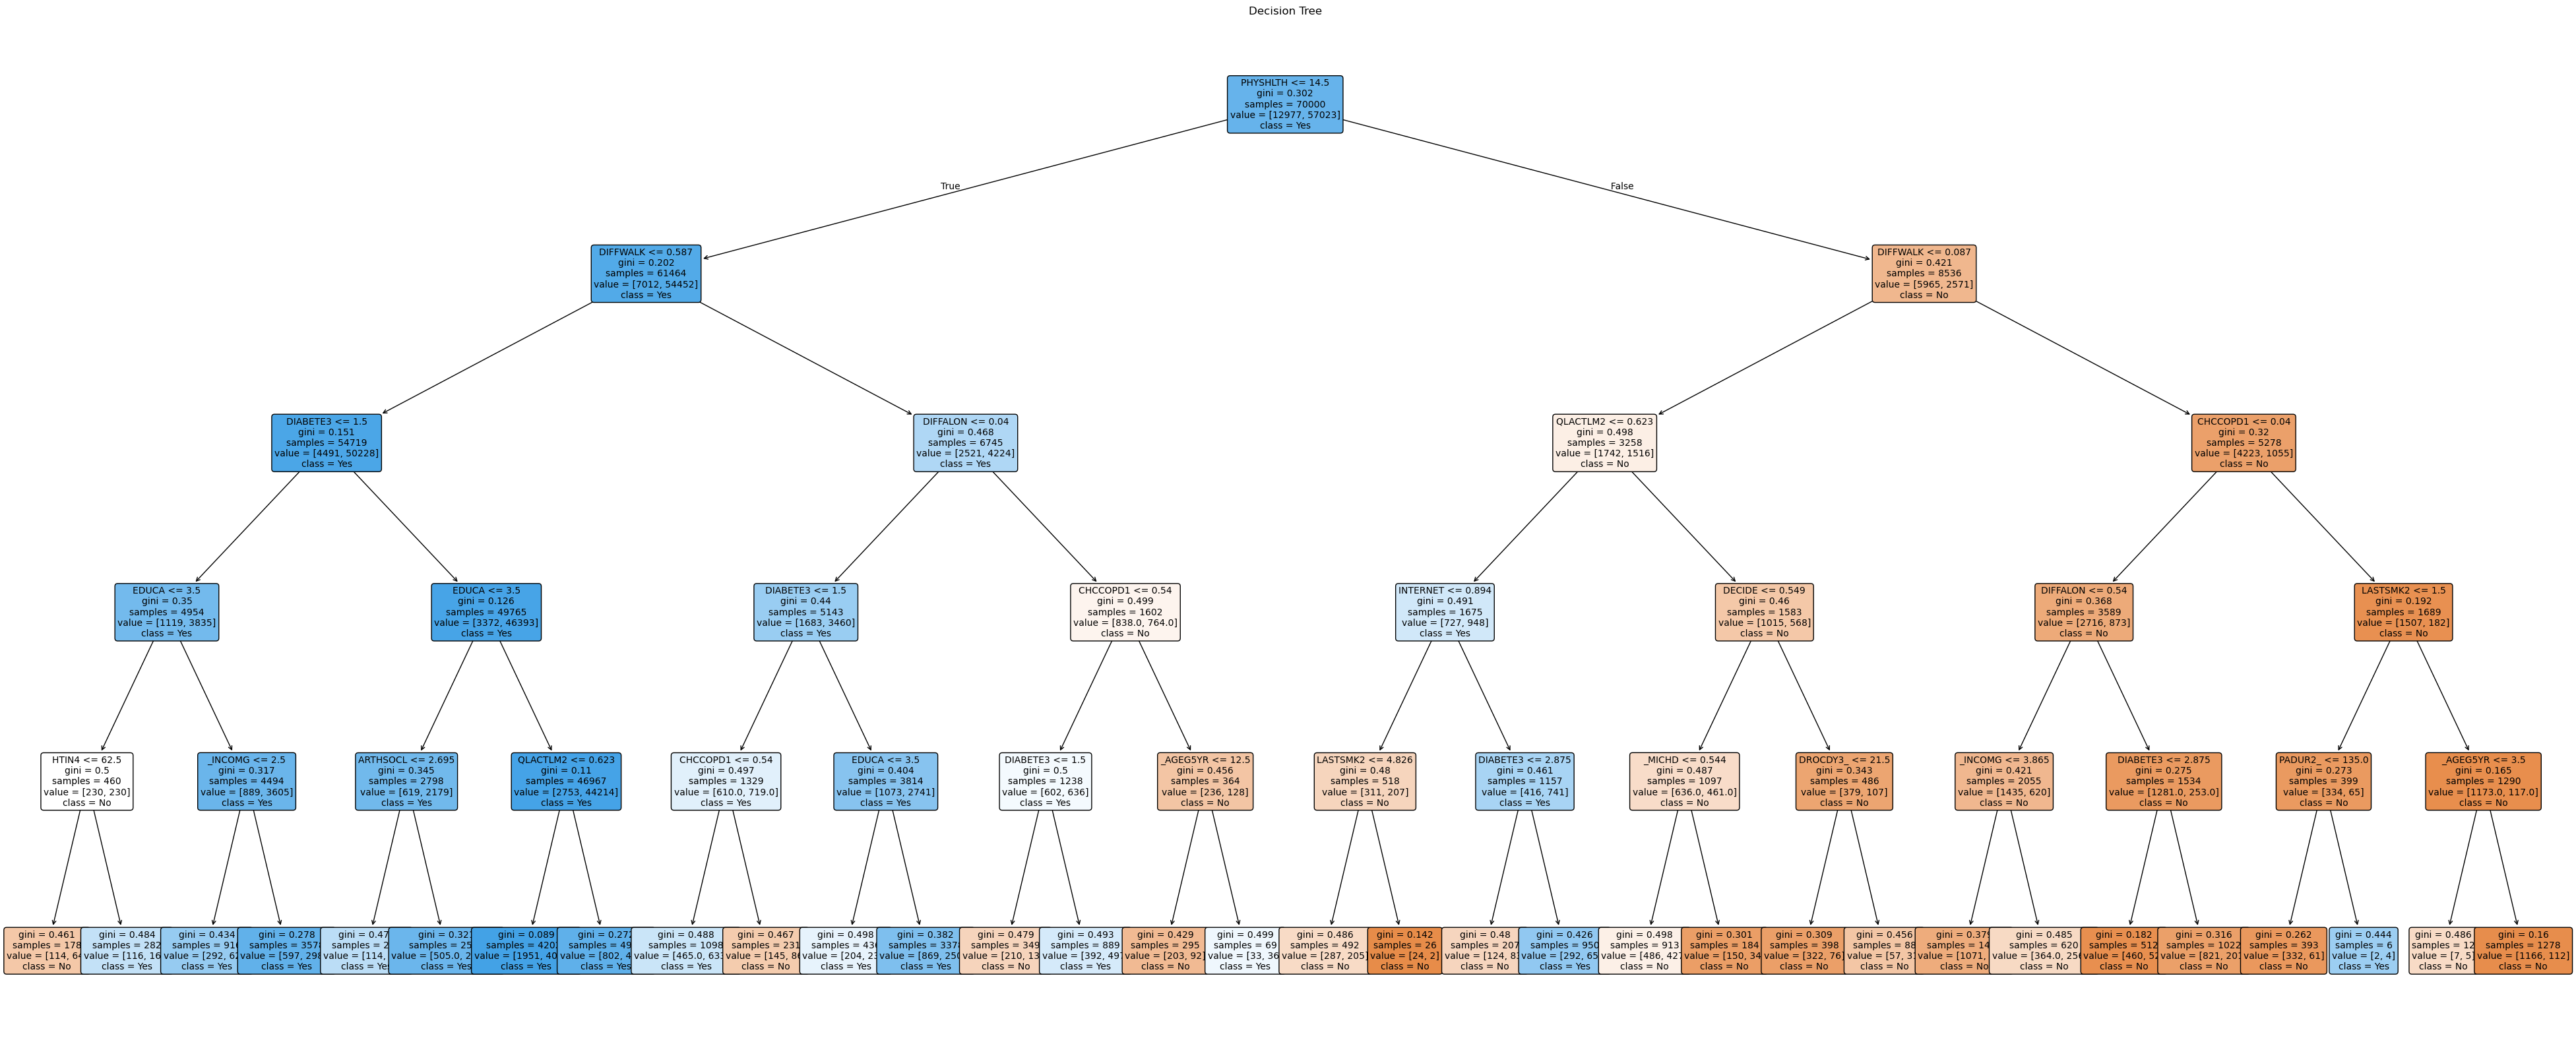

In [ ]:
#visualizing the decision tree
plt.figure(figsize=(50, 20))  # Bigger figure for readability
plot_tree(
    dtree,
    feature_names=X.columns,       
    class_names=['No', 'Yes'],     
    filled=True,                   
    rounded=True,                  
    fontsize=10                    
)
plt.title("Decision Tree")
plt.show()

<Figure size 640x480 with 0 Axes>

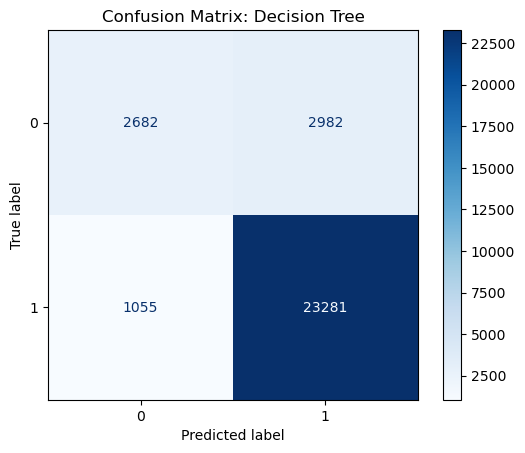

In [ ]:
plt.clf()
y_pred = dtree.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)

# Plot
disp.plot(cmap='Blues')  
plt.title("Confusion Matrix: Decision Tree")
plt.show()

# Random Forest

Our process for the Random Forest model is very similar to that of Decision Tree, where we split the data into test/train. 

For finding the best set of parameters, we vary the model inputs using a function and compare their precision.

In [23]:
X = df_cleaned.drop(columns=['_RFHLTH'])  
y = df_cleaned['_RFHLTH'].round().astype(int)     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      5664
           1       0.89      0.96      0.92     24336

    accuracy                           0.87     30000
   macro avg       0.81      0.72      0.75     30000
weighted avg       0.86      0.87      0.86     30000

[[ 2726  2938]
 [  977 23359]]


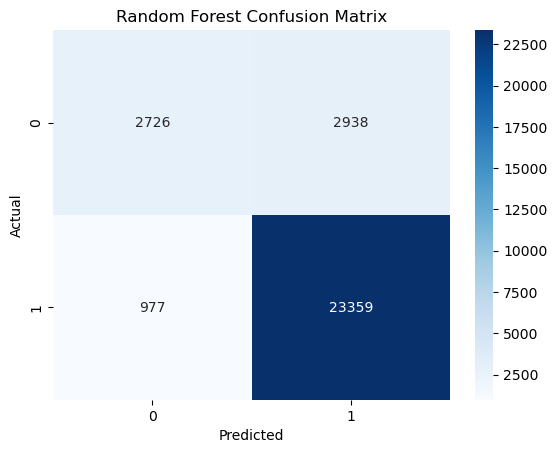

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Accuracy and ROC AUC are both shown for demonstration purposes. However, only ROC AUC statistics are valid for precision comparison since we have a imbalanced dataset.

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Accuracy: 0.8695
ROC AUC: 0.8838703565571638


In [26]:
#do model tuning to find the best set of parameters
# Define parameters
n_estimators_list = [100, 200, 300]
max_depth_list = [None, 10, 20]
max_features_list = ['sqrt', 'log2']

results = []

for n in n_estimators_list:
    for depth in max_depth_list:
        for features in max_features_list:
            model = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                max_features=features,
                random_state=42,
                n_jobs=-1
            )
            scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
            
            results.append({
                'n_estimators': n,
                'max_depth': depth,
                'max_features': features,
                'mean_roc_auc': scores.mean(),
                'std_roc_auc': scores.std()
            })

rf_results = pd.DataFrame(results)


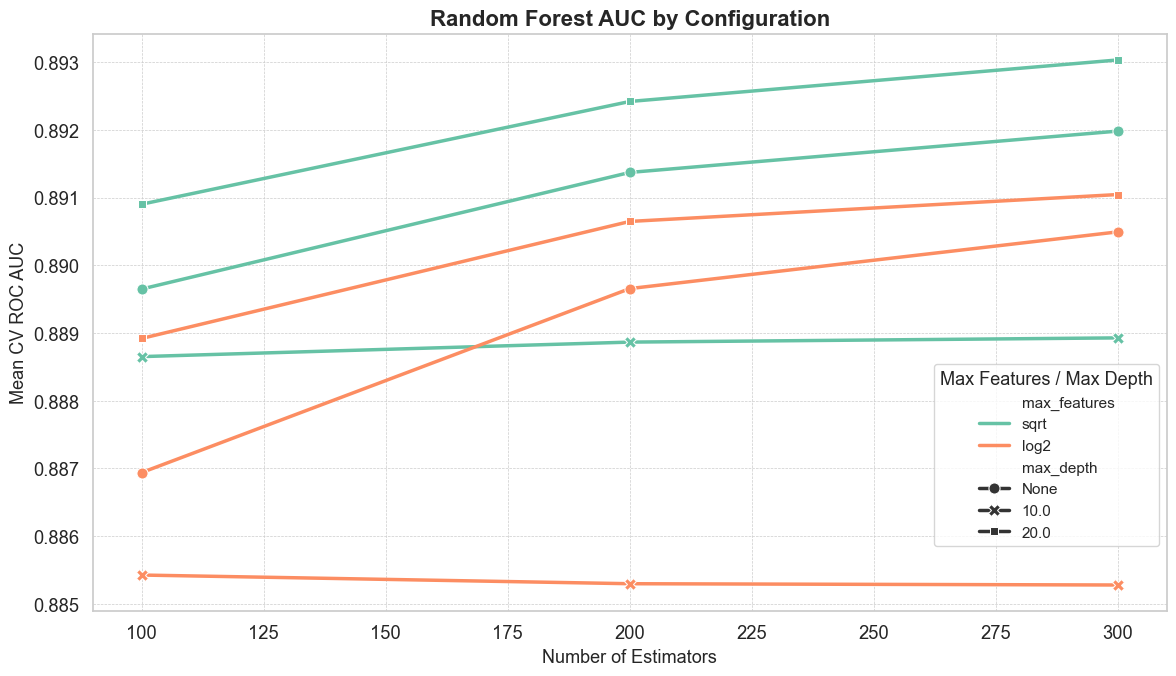

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 7))
ax = sns.lineplot(
    data=rf_results,
    x='n_estimators',
    y='mean_roc_auc',
    hue='max_features',
    style='max_depth',
    markers=True,
    dashes=False,
    palette='Set2', 
    linewidth=2.5,
    markersize=8
)

ax.legend(title="Max Features / Max Depth", title_fontsize='13', fontsize='11', loc='lower right', bbox_to_anchor =(1, 0.1), frameon=True)

plt.title("Random Forest AUC by Configuration", fontsize=16, weight='bold')
plt.xlabel("Number of Estimators", fontsize=13)
plt.ylabel("Mean CV ROC AUC", fontsize=13)

plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [39]:
#list the most important features
rf_best_model = RandomForestClassifier(
                n_estimators=300,
                max_depth=20,
                max_features='sqrt',
                random_state=42,
                n_jobs=-1
            )
rf_best_model.fit(X, y)
fi = pd.DataFrame({'feature': X.columns,
                   'importance': rf_best_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(10)

,feature,importance
5,PHYSHLTH,0.093736
43,DIFFWALK,0.045264
39,QLACTLM2,0.036132
45,DIFFALON,0.029065
64,ARTHSOCL,0.021645
87,_BMI5,0.019328
6,MENTHLTH,0.018840
40,USEEQUIP,0.018690
65,JOINPAIN,0.018465
105,_VEGESUM,0.016776


# XGBoost

Repeat the same process for XGBoost

In [47]:
param_grid = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05},
    {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05},
    {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05},
    {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05},
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
    {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
]

In [48]:
#find best set of parameters
results = []

for params in param_grid:
    model = XGBClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        use_label_encoder=False,
        eval_metric='auc',
        scale_pos_weight=1,  # can change later if imbalance is high
        n_jobs=-1,
        random_state=42
    )
    
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    
    results.append({
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'learning_rate': params['learning_rate'],
        'mean_auc': scores.mean(),
        'std_auc': scores.std()
    })

xgb_results = pd.DataFrame(results)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

<Figure size 640x480 with 0 Axes>

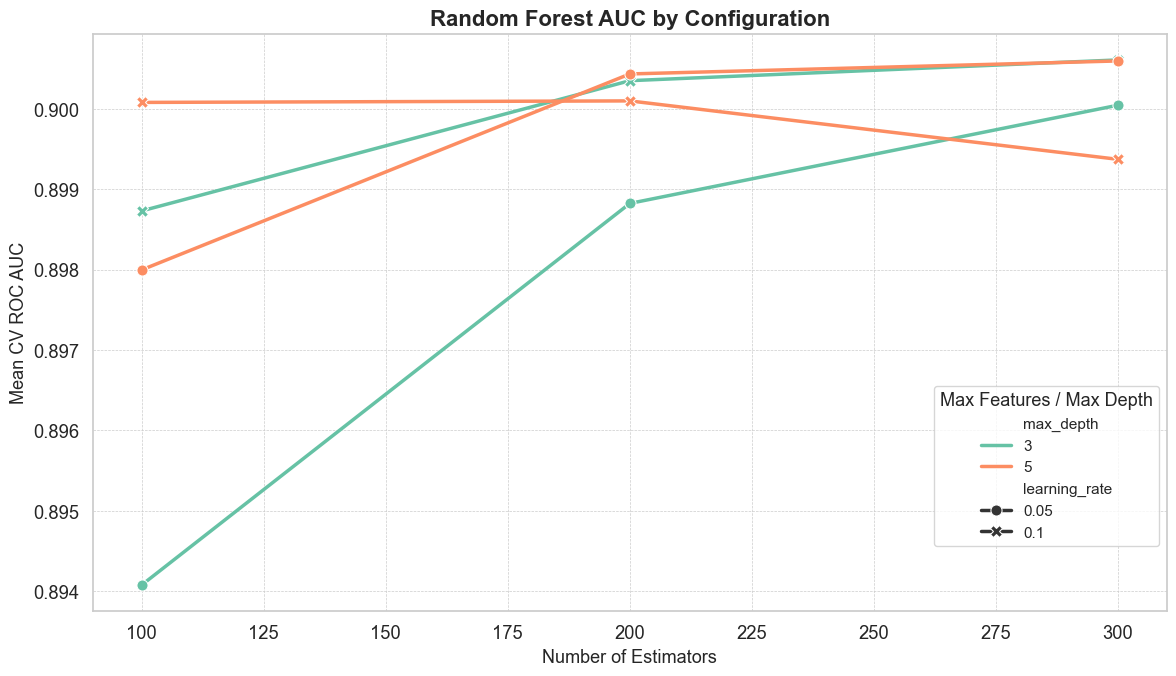

In [49]:
plt.clf()
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 7))
ax = sns.lineplot(
    data=xgb_results,
    x='n_estimators',
    y='mean_auc',
    hue='max_depth',
    style='learning_rate',
    markers=True,
    dashes=False,
    palette='Set2', 
    linewidth=2.5,
    markersize=8
)

ax.legend(title="Max Features / Max Depth", title_fontsize='13', fontsize='11', loc='lower right', bbox_to_anchor =(1, 0.1), frameon=True)

plt.title("Random Forest AUC by Configuration", fontsize=16, weight='bold')
plt.xlabel("Number of Estimators", fontsize=13)
plt.ylabel("Mean CV ROC AUC", fontsize=13)

plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [50]:
#show feature importance
xgb_final_model = XGBClassifier(
    n_estimators= 300,
    max_depth= 3,
    learning_rate= 0.1,
    use_label_encoder=False,
    eval_metric='auc',
    scale_pos_weight=1,
    n_jobs=-1,
    random_state=42
)
xgb_final_model.fit(X, y)

fi_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_final_model.feature_importances_
}).sort_values('importance', ascending=False)

fi_xgb.head(10)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,feature,importance
5,PHYSHLTH,0.127057
39,QLACTLM2,0.114503
36,INTERNET,0.074026
43,DIFFWALK,0.055730
64,ARTHSOCL,0.045584
90,_INCOMG,0.042092
54,EXERANY2,0.041330
10,BPHIGH4,0.033772
28,EDUCA,0.032933
42,DECIDE,0.028366


# Final Comparison

In [52]:
#compare percision between all models
final_models = {
    "Decision Tree": dtree,
    "Random Forest": rf_best_model,
    "XGBoost": xgb_final_model
}

results = []

for name, model in final_models.items():
    auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    results.append({
        'Model': name,
        'Mean AUC': auc.mean(),
        'Std AUC': auc.std()
    })

comparison_df = pd.DataFrame(results)
print(comparison_df.sort_values('Mean AUC', ascending=False))

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

           Model  Mean AUC   Std AUC
2        XGBoost  0.900610  0.002746
1  Random Forest  0.893031  0.002822
0  Decision Tree  0.846071  0.003196
